<a href="https://colab.research.google.com/github/williambrunos/Introduction-To-ML/blob/main/Class_3/K_means_oficina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Leitura dos dados

In [2]:
df = pd.read_csv('https://leadfortaleza.com.br/ead2pcd/conteudo/tmp/myopenolat_1_102577677377129//Oficina/download/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

### Verificar dados nulos

In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
print(df.info()) # 200 observações ao todo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


### Informações estatísticas

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Gerando gráfico da idade versus score do cliente

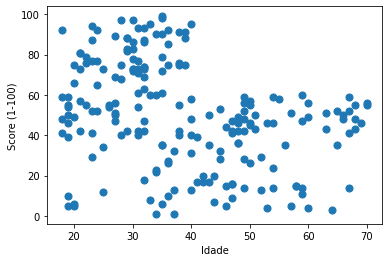

In [7]:
plt.scatter(df['Age'], df['Spending Score (1-100)'], s=50)
plt.xlabel('Idade')
plt.ylabel('Score (1-100)')
plt.show()

### Agora é sua vez de praticar

selecione os dados de 'Age' e 'Spending Score (1-100)' no dataframe para realizar o agrupamento com kmeans

In [11]:
# selecione no dataframe df as colunas Age e Spending Score (1-100)
X = df[['Age', 'Spending Score (1-100)']]
print(X)

     Age  Spending Score (1-100)
0     19                      39
1     21                      81
2     20                       6
3     23                      77
4     31                      40
..   ...                     ...
195   35                      79
196   45                      28
197   32                      74
198   32                      18
199   30                      83

[200 rows x 2 columns]


### Clusterizando com k = 5

In [12]:
# escreva aqui em baixo o código para fazer a clusterização
from sklearn.cluster import KMeans

In [13]:
model = KMeans(n_clusters=5, init='k-means++') # k-means++ para inicializar os centróides iniciais de forma otimizada
y_classes = model.fit_predict(X)
print(y_classes)

[0 2 3 2 0 2 3 2 4 2 4 2 4 2 3 2 0 0 4 2 0 2 4 2 4 2 4 0 4 2 4 2 4 2 4 2 4
 2 3 2 1 2 1 0 4 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1
 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1
 0 0 0 0 0 1 1 1 1 0 0 0 2 3 2 1 2 4 2 4 2 0 2 3 2 4 2 3 2 4 2 0 2 3 2 1 2
 3 2 4 2 4 2 4 2 3 2 3 2 1 2 3 2 4 2 4 2 3 0 3 2 3 2 4 2 4 2 4 2 3 2 4 2 1
 2 4 2 4 2 3 2 3 2 4 2 4 2 3 2]


### Plot um gráfico com todos os grupos

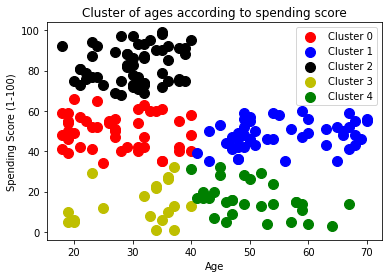

In [15]:
# escreva aqui o código para plotar o gráfico
k_groups = 5
colors = ['r', 'b', 'k', 'y', 'g']
for k in range(k_groups):
  cluster_points = X[y_classes == k]
  plt.scatter(cluster_points['Age'], cluster_points['Spending Score (1-100)'], s=100, c=colors[k], label=f'Cluster {k}')

plt.title('Cluster of ages according to spending score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()